In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [3]:
bankdata = pd.read_csv('termdeposit_test.csv')

In [4]:
bankdata.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [6]:
bankdata.select_dtypes(np.int64).nunique()

ID          13564
age            75
balance      4292
day            31
duration     1201
campaign       40
pdays         422
previous       33
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

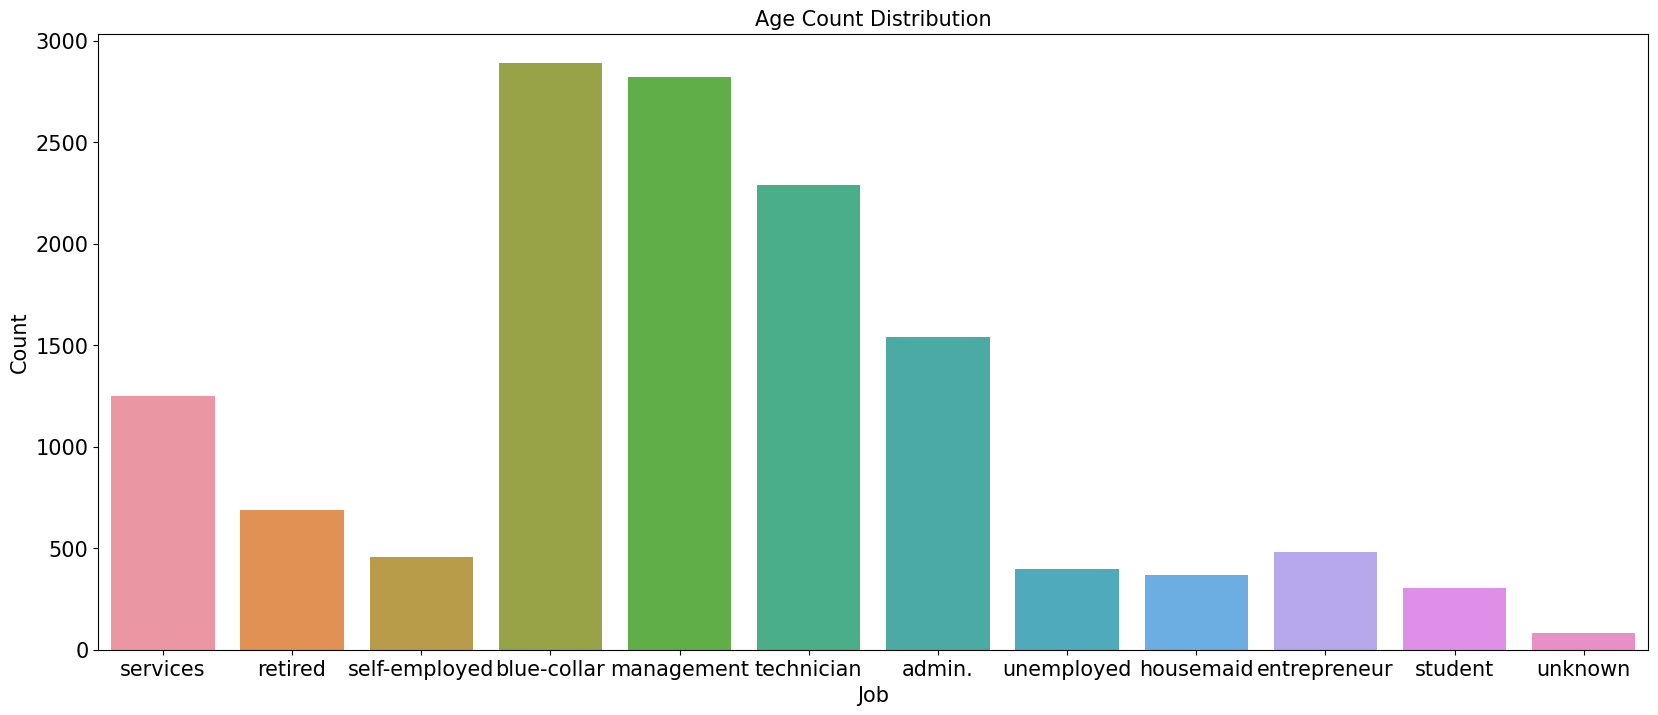

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=bankdata)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

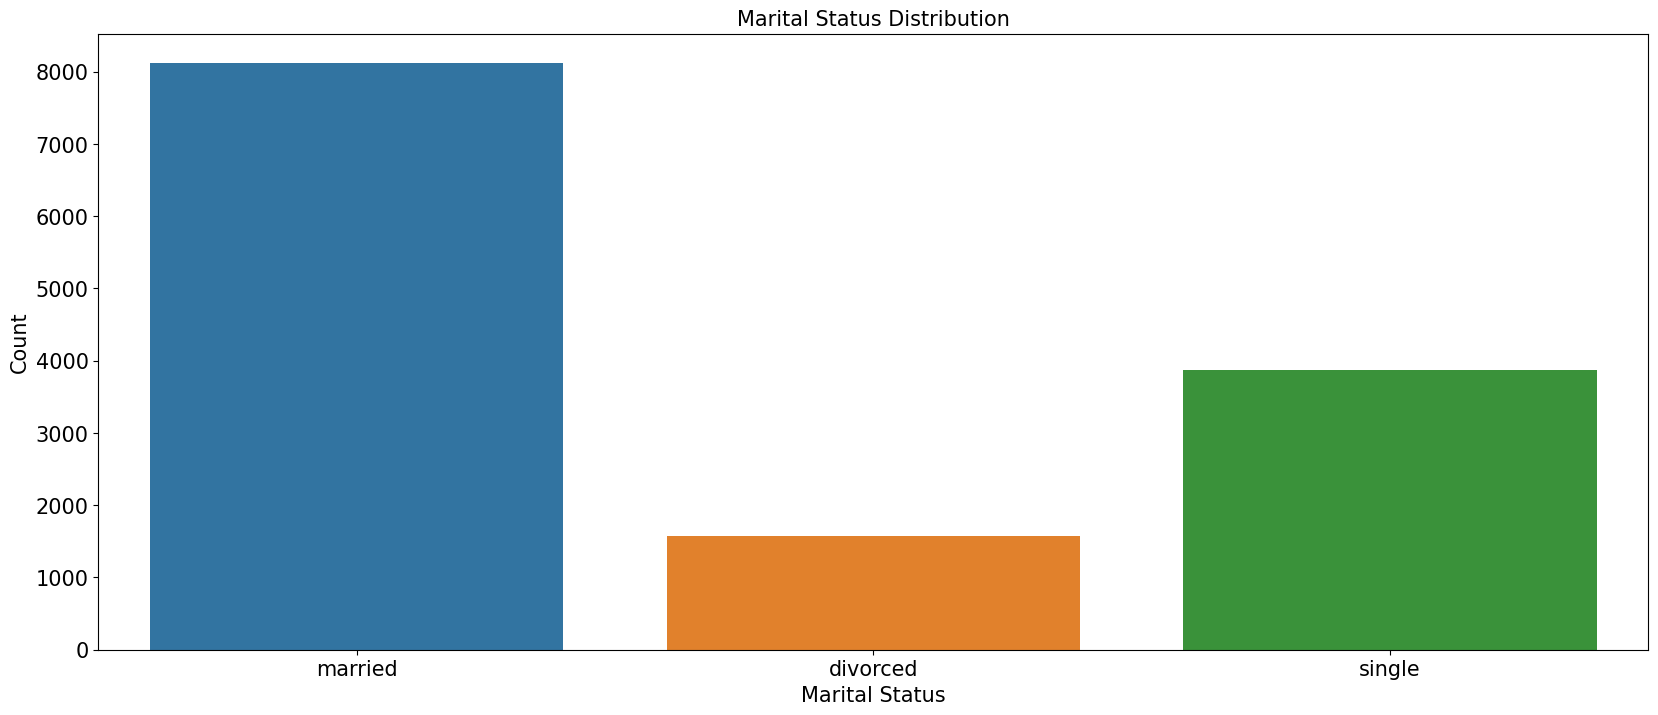

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data=bankdata)
ax.set_xlabel('Marital Status', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Marital Status Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

ValueError: Could not interpret input 'y'

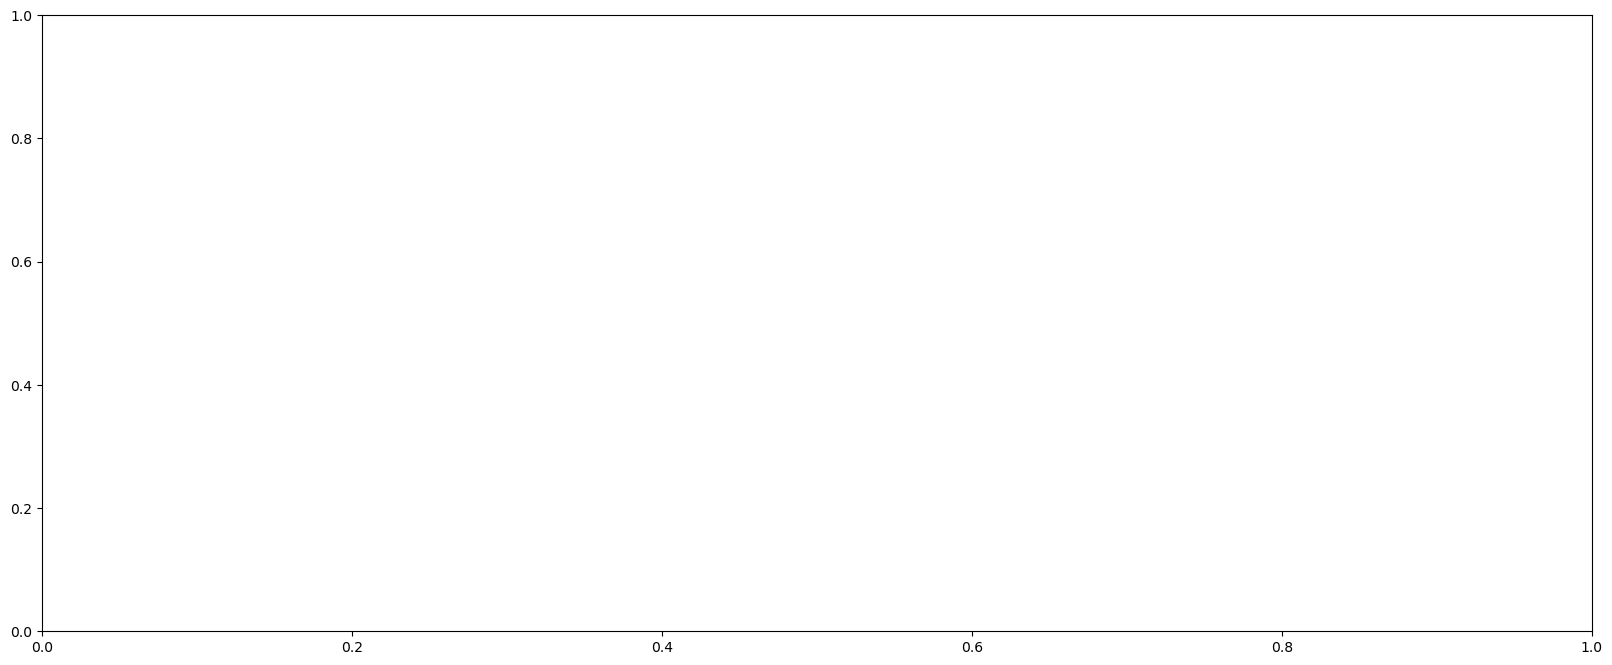

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.violinplot(x='marital', y='y', data=bankdata);
plt.title('Marital Status/Deposit Distribution'); plt.xlabel('Marital Status'); plt.ylabel('y')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

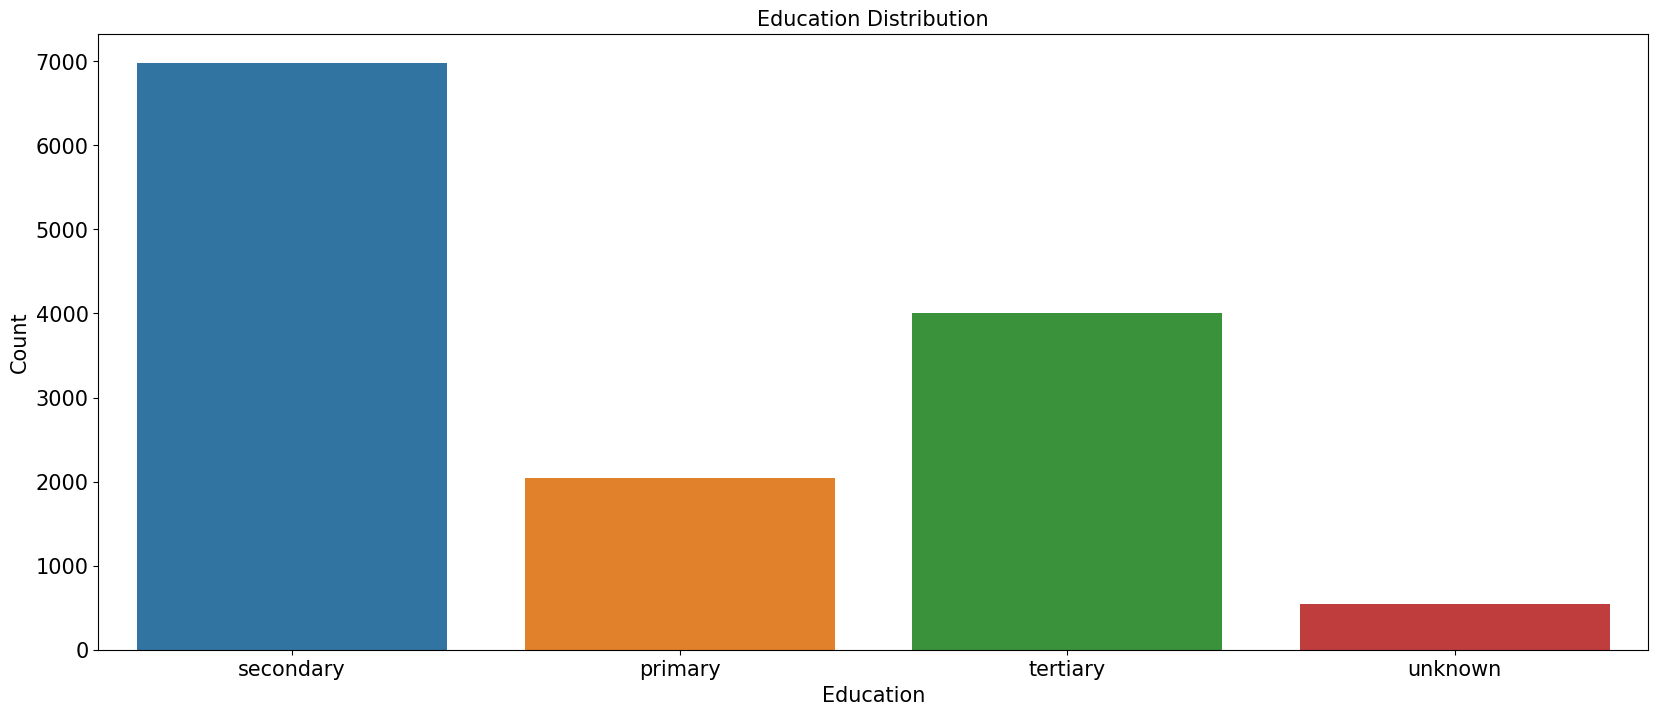

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data=bankdata)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

In [11]:
# Create correlation matrix
corr_matrix = bankdata.corr()

C:\Users\Abhimanyu Singh\AppData\Local\Temp\ipykernel_9560\3311956812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bankdata.corr()


In [12]:
mapping = {"yes": 1, "no": 0}
bankdata['y'] = bankdata['y'].replace(mapping).astype(np.float64)

KeyError: 'y'

ValueError: Could not interpret input 'y'

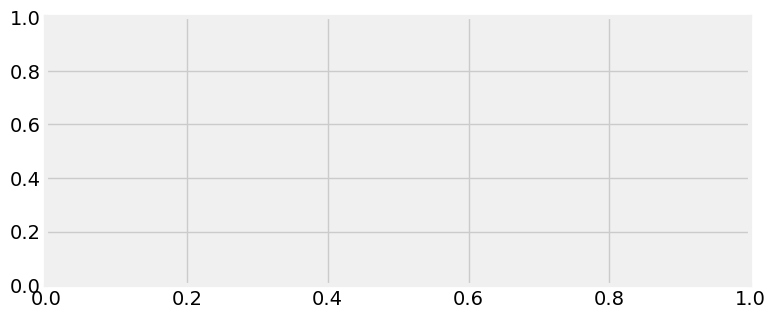

In [13]:
#violin plot to evaluate duration values and outcomes of int64

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.int64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

In [14]:
#analysing the label
plt.hist(bankdata['y'], bins='auto')

KeyError: 'y'

In [15]:
bankdata.select_dtypes(np.float64).nunique()

Series([], dtype: float64)

In [16]:
#violin plot to evaluate duration values and outcomes of floats

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.float64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

<Figure size 2000x1600 with 0 Axes>

In [17]:
#get dummy variables for categorical data
df = bankdata[['job', 'marital', 'education', 'poutcome']]

dummiesdf = pd.get_dummies(df)

dummiesdf.shape

(13564, 23)

In [18]:
#mapping boolean data to 0/1

mapping = {"yes": 1, "no": 0, 'unknown': 2}

bankdata['default'] = bankdata['default'].replace(mapping).astype(np.float64)
bankdata['housing'] = bankdata['housing'].replace(mapping).astype(np.float64)
bankdata['loan'] = bankdata['loan'].replace(mapping).astype(np.float64)

In [19]:
mapping = {"failure": 0, "nonexistent": 1, 'success': 2}

bankdata['poutcome'] = bankdata['poutcome'].replace(mapping).astype(np.float64)

ValueError: could not convert string to float: 'unknown'

In [20]:
bankdata.shape

(13564, 17)

In [21]:
finaldf = pd.concat([bankdata[['poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

SyntaxError: incomplete input (3585491083.py, line 1)

In [22]:
finaldf.fillna(0)

NameError: name 'finaldf' is not defined

In [23]:
#split train & test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldf, bankdata['y'], test_size=0.33, random_state = 32)

print(finaldf.shape)
print(bankdata['y'].shape)
print(bankdata.shape)
print(y_train)

NameError: name 'finaldf' is not defined

In [24]:
#evaluating first attempt
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [25]:
pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])
train_set = pipeline.fit_transform(X_train)
test_set = pipeline.transform(X_test)
train_labels = y_train

features = list(finaldf.columns)
print(train_set)

NameError: name 'Pipeline' is not defined

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)

## 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

NameError: name 'RandomForestClassifier' is not defined

In [27]:
model.fit(train_set, train_labels)

RFCpred = model.predict(X_test)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

import collections
collections.Counter(RFCpred)

NameError: name 'model' is not defined

In [28]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
     # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

In [29]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

NameError: name 'feature_importances' is not defined

In [30]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [31]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [32]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

NameError: name 'train_set' is not defined

In [33]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

NameError: name 'train_set' is not defined

In [34]:
model_results = cv_model(train_set, train_labels, RandomForestClassifier(), 
                         'RFC', model_results)


print(model_results)

NameError: name 'train_set' is not defined

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

#confmatrix = (y_test[:1], RFCpred)

y_testpd = pd.Series(y_test)

confmatrix = (y_test, RFCpred)

NameError: name 'y_test' is not defined

In [36]:
cm = confusion_matrix(y_test, RFCpred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=annot, fmt='', ax=ax)

NameError: name 'y_test' is not defined

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [39]:

from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [42]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train' is not defined

In [44]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)

NameError: name 'RFCCV' is not defined